## Import necessary modules

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/kaggle/input/food-waste/Food Waste data and research - by country.csv')
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


## Exploratory Data Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
combined figures (kg/capita/year),214.0,1.267944e+02,2.215788e+01,61.0,115.00,123.0,137.75,260.0
Household estimate (kg/capita/year),214.0,8.429439e+01,1.831371e+01,33.0,74.00,80.0,95.00,189.0
Household estimate (tonnes/year),214.0,2.658896e+06,8.596906e+06,850.0,68315.50,520508.0,2111314.50,91646213.0
Retail estimate (kg/capita/year),214.0,1.511682e+01,5.767840e+00,3.0,13.00,16.0,16.00,79.0
Retail estimate (tonnes/year),214.0,5.520454e+05,2.195578e+06,138.0,12509.25,100650.0,356815.75,22424705.0
Food service estimate (kg/capita/year),214.0,2.738318e+01,6.508420e+00,3.0,26.00,28.0,28.00,90.0
Food service estimate (tonnes/year),214.0,1.138859e+06,5.380459e+06,276.0,22391.25,188466.0,630761.75,65377741.0
M49 code,214.0,4.339720e+02,2.521858e+02,4.0,219.00,432.0,645.25,894.0


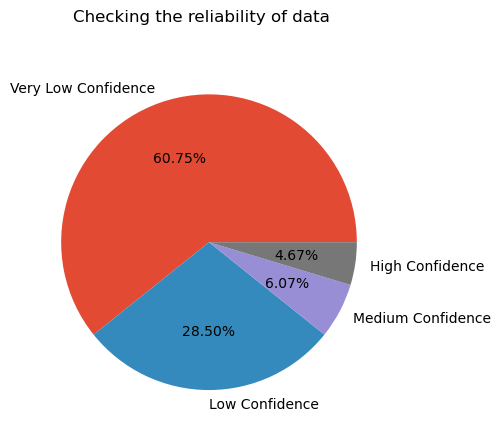

In [35]:
## Checking the reliability of data
df['Confidence in estimate'].value_counts().plot(kind='pie',autopct='%1.2f%%',subplots=True)
plt.suptitle('Checking the reliability of data')
plt.ylabel("")
plt.show()  ## Not reliable since majority of data have very low confidence

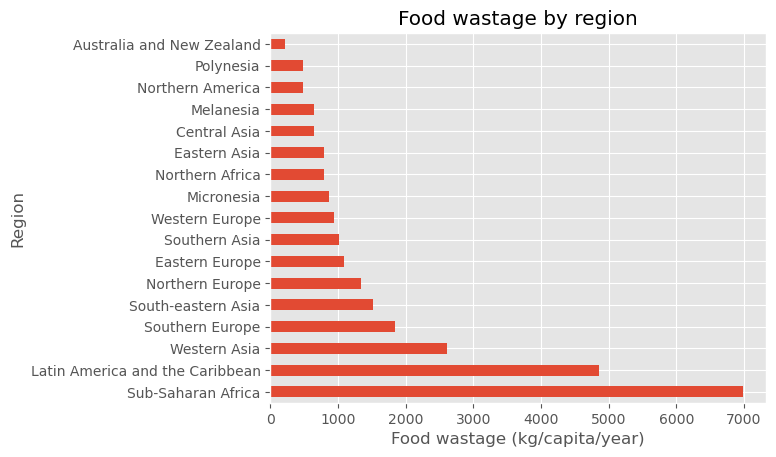

In [12]:
## Q. Which region waste the most amount of food?
waste_by_region = df.groupby('Region')['combined figures (kg/capita/year)'].sum().sort_values(ascending=False)
waste_by_region.plot(kind='barh',title='Food wastage by region')
plt.xlabel('Food wastage (kg/capita/year)')
plt.show()

In [16]:
estimates_col = ['combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)']

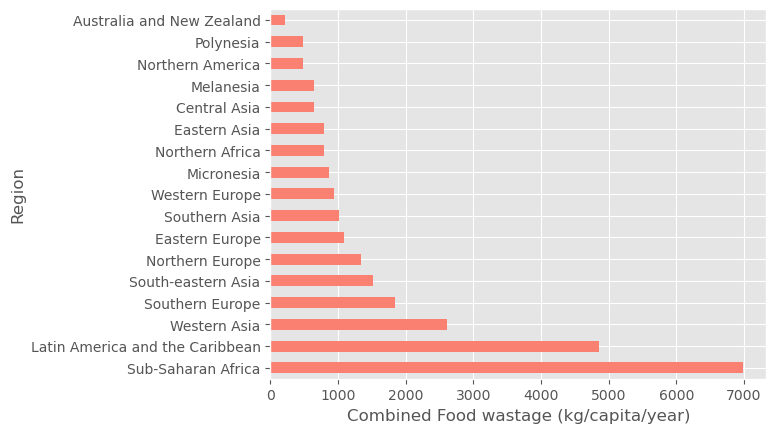

In [29]:
#visualize the combined figures for each country
country_wise_combined_fig = df.groupby('Region')[estimates_col].sum()['combined figures (kg/capita/year)']
country_wise_combined_fig.sort_values(ascending=False).plot(kind='barh',color='salmon')
plt.xlabel('Combined Food wastage (kg/capita/year)')
plt.show()

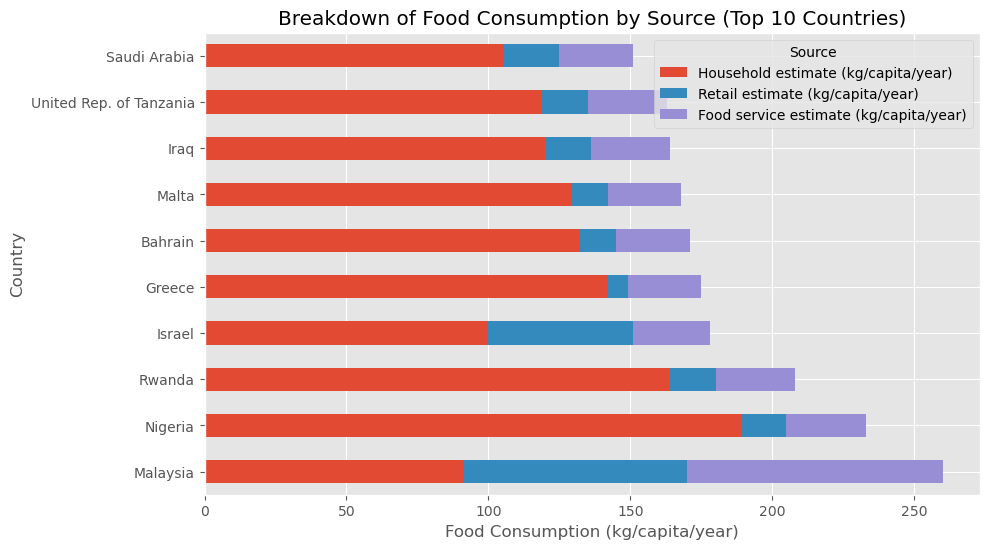

In [37]:
# Calculate the total food consumption for each country
df['Total Consumption (kg/capita/year)'] = df['Household estimate (kg/capita/year)'] + \
                                            df['Retail estimate (kg/capita/year)'] + \
                                            df['Food service estimate (kg/capita/year)']

# Sort the DataFrame by total consumption in descending order
sorted_df = df.sort_values(by='Total Consumption (kg/capita/year)', ascending=False)

# Select the top 10 countries with the highest total consumption
top_countries = sorted_df.head(10)

# Subset the data for the top countries
data = top_countries[['Country', 'Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']]

# Set the 'Country' column as the index for easier plotting
data.set_index('Country', inplace=True)

# Plot the horizontal stacked bar chart
data.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Food Consumption (kg/capita/year)')
plt.ylabel('Country')
plt.title('Breakdown of Food Consumption by Source (Top 10 Countries)')
plt.legend(title='Source', loc='upper right')
plt.show()

In [39]:
# choropleth map
fig = px.choropleth(
    df,
    locations='Country',  # 'Country' column directly as the location
    locationmode='country names',  # location mode as 'country names'
    color='combined figures (kg/capita/year)',
    hover_name='Country',
    projection='natural earth'  # map projection
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGrey")
fig.update_layout(title_text='Geographic Distribution of Food Consumption (kg/capita/year)')
fig.show()

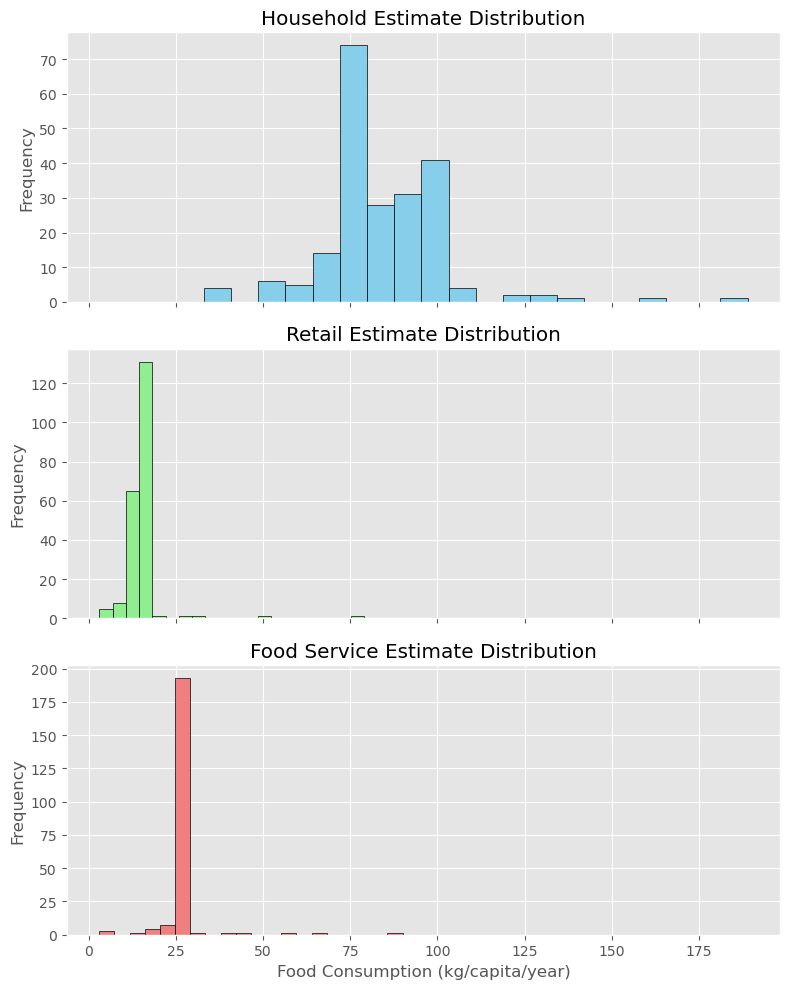

In [40]:
# Select the columns for household, retail, and food service estimates
estimates_data = df[['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']]

# Plot histograms for each estimate
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# Household estimate histogram
axes[0].hist(estimates_data['Household estimate (kg/capita/year)'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Household Estimate Distribution')
axes[0].set_ylabel('Frequency')

# Retail estimate histogram
axes[1].hist(estimates_data['Retail estimate (kg/capita/year)'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Retail Estimate Distribution')
axes[1].set_ylabel('Frequency')

# Food service estimate histogram
axes[2].hist(estimates_data['Food service estimate (kg/capita/year)'], bins=20, color='lightcoral', edgecolor='black')
axes[2].set_title('Food Service Estimate Distribution')
axes[2].set_ylabel('Frequency')
axes[2].set_xlabel('Food Consumption (kg/capita/year)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()